## Supplementary figure: percolation of defects

In [21]:
%matplotlib inline
#
from LRGSG_package.LRGSG import *
#
move_to_rootf(print_tf=True)
plt.style.use('nb/nb_plotsheet.mplstyle')
#
col1 = plt.cm.twilight(0.2)
col2 = plt.cm.twilight(0.65)
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
figpath = "data/plot/paper/suppinf/"

cwd: /home/opisthofulax/PhD/projects/complex-networks/LRG-Signed


### Single flip squared
- todo: check dynamics coincide with eignstate

In [22]:
# .trash
# latt = Lattice2D(side1=16, 
#                  geo='squared', 
#                  pbc=True)
# latt.flip_sel_edges(latt.neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H)
# latt.compute_k_eigvV()
# G_edges_ww = latt.G.edges(data='weight')

# col1 = plt.cm.twilight(0.2)
# col2 = plt.cm.twilight(0.65)

# edgecol = ['lightblue' if e[2] > 0 else 'red' for e in G_edges_ww]
# #
# fig, ax = plt.subplots(figsize=(5, 5))
# ax.set_aspect('equal');
# cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
# custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)

# kwnxdraw = dict(ax=ax, pos=latt.posG,
#                 cmap=custom_cmap,
#                 edge_color=edgecol, 
#                 node_size=100, 
#                 node_color=-np.abs(latt.eigV[0]), 
#                 width=2)

# nx.draw(latt.G, **kwnxdraw)
# fig.savefig(f"{figpath}{latt.geo}_singleflip.pdf", 
#             bbox_inches='tight', transparent=True, pad_inches=0)
# plt.close('all')

In [23]:
lattices = {}
geometry = 'squared'
cell = 'single'
sizes = 2**np.arange(3, 10)
#
for side in sizes:
    lattices[side] = Lattice2D(#
        side1 = side,
        geo = geometry,
        sgpath='plot/paper/suppinf/'
    )
    if cell == 'single':
        flipdict = lattices[side].neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H
    elif cell == 'square':
        ff = list(lattices[side].neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H.keys())[0][1]
        flipdict = lattices[side].neg_weights_dict.get_neg_weights_dict_h_square(ff)
    lattices[side].flip_sel_edges(flipdict)
    #
    eigvpath = f"{lattices[side].lrgsgpath}eigV0_{cell}.npy"
    #
    if os.path.exists(eigvpath):
        print(f"reading {side}", end="\r")
        setattr(lattices[side], 'eigV', np.load(eigvpath))
        continue
    else:
        print(f"computing {side}", end="\r")
        lattices[side].compute_k_eigvV()
        with open(eigvpath, 'wb') as f:
            np.save(f, np.abs(lattices[side].eigV))

(-0.5, 63.5, -0.5, 63.5)

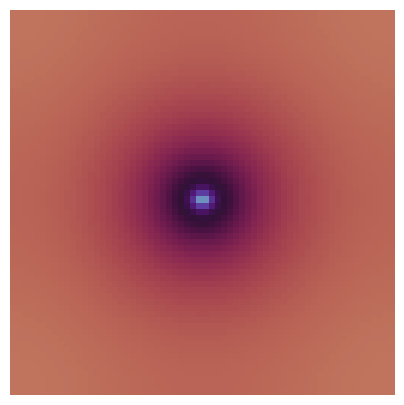

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.set_aspect('equal')
im = ax.imshow(unravel_1d_to_2d_nodemap(lattices[sizes[3]].eigV[0], lattices[sizes[3]].invnode_map), cmap=custom_cmap)
ax.axis('off')

In [27]:
fig, ax = plt.subplots(figsize=(10, 10))
#
ax.set_ylabel(r'${\phi(x,\, \bar{y}_\parallel)}/{\phi_{\min}}$', labelpad=10)
ax.set_xlabel(r'$x$')
ax.set_xscale('symlog')
#
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
for side, c in zip(sizes[::-1], custom_cmap(np.linspace(0, 1, len(sizes)))):
    kwdict = {"ls": '-',
              'c': c, 
              'marker': 'H', 
              'ms': 10, 
              'mfc': set_alpha_torgb(c, 0.75), 
              'label': fr"$N={side**2}$"}  
    eigen_state = flip_to_positive_majority(lattices[side].eigV[0].reshape(lattices[side].syshape))
    phi_plot = (eigen_state/np.min(eigen_state))[:, lattices[side].side1//2]
    x = np.linspace(-side//2, side//2, num=len(phi_plot))
    ax.plot(x, phi_plot, **kwdict)
x = np.linspace(-sizes[-1]//2, sizes[-1]//2, num=2000)
ax.plot(x, .6*np.log(np.abs(x))+1.5, c='red', label=r'$a\log(x) + b$')
#
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, fontsize=24)
#
kwvlines = {'ls':'--', 'lw':1, 'c':'k'}
for i in [-1, +1, -lattices[sizes[0]].r_c, +lattices[sizes[0]].r_c]:
    ax.axvline(i, **kwvlines)
#
fig.savefig(f"{figpath}{lattices[sizes[0]].geo}_singleflip_para.pdf", bbox_inches='tight', transparent=True)
plt.close('all')

In [28]:
fig, ax = plt.subplots(figsize=(10, 10))
#
ax.set_ylabel(r'${\phi(\bar{x}_\perp,\, y)}/{\phi_{\min}}$', labelpad=10)
ax.set_xlabel(r'$y$')
ax.set_xscale('symlog')
#
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
for side, c in zip(sizes[::-1], custom_cmap(np.linspace(0, 1, len(sizes)))):
    kwdict = {"ls": '-',
              'c': c, 
              'marker': 'H', 
              'ms': 10, 
              'mfc': set_alpha_torgb(c, 0.75), 
              'label': fr"$N={side**2}$"}  
    eigen_state = np.abs(lattices[side].eigV[0].reshape(lattices[side].syshape))
    phi_plot = (eigen_state/np.min(eigen_state))[lattices[side].side1//2, :]
    x = np.linspace(-side//2, side//2, num=len(phi_plot))-.5
    ax.plot(x, phi_plot, **kwdict)
x = np.linspace(-sizes[-1]//2, sizes[-1]//2, num=2000)
ax.plot(x, .6*np.log(np.abs(x))+1.5, c='red', label=r'$a\log(x) + b$')
#
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, fontsize=24)
#
kwvlines = {'ls':'--', 'lw':1, 'c':'k'}
for i in [-1, +1, -lattices[sizes[0]].r_c, +lattices[sizes[0]].r_c]:
    ax.axvline(i, **kwvlines)
#
fig.savefig(f"{figpath}{lattices[sizes[0]].geo}_singleflip_perp.pdf", bbox_inches='tight', transparent=True)
plt.close('all')

### Single flip triangle

In [7]:
# .trash
# side1 = 5
# latt = Lattice2D(side1 = side1,
#                  geo='triangular',
#                  pbc=False)

# latt.flip_sel_edges(latt.neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H)
# # latt.flip_random_fract_edges()

# G_edges_ww = latt.G.edges(data='weight')
# edgecol = ['lightblue' if e[2] > 0 else 'r' for e in G_edges_ww]
# latt.compute_k_eigvV()

# custom_colormap = create_custom_colormap('red', 'lightblue', 256)

# metrics = latt.eigV[0]

# norm = plt.Normalize(vmin=metrics.min(), vmax=metrics.max())

# fig, ax = plt.subplots(figsize=(5, 5))
# ax.set_aspect('equal');
# cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
# custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)

# kwnxdraw = dict(ax=ax, pos=latt.posG,
#                 cmap=custom_cmap,
#                 edge_color=edgecol, 
#                 node_size=60, 
#                 node_color=-np.abs(latt.eigV[0]), 
#                 width=2)

# nx.draw(latt.G, **kwnxdraw)
# fig.savefig(f"{figpath}{latt.geo}_singleflip.pdf", 
#             bbox_inches='tight', transparent=True, pad_inches=0)
# # Create a colorbar
# sm = plt.cm.ScalarMappable(cmap=custom_colormap, norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label('Metric Value', rotation=270, labelpad=20)





# def nodelist_mkr(lattice, cent = None):
#     inc = 0
#     inc2 = 0
#     if not cent:
#         cent = lattice.invnode_map[list(lattice.neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H.keys())[0][0]]
#     nodelist = [cent]
#     for i in range(1, lattice.side1//2):
#         if i % 2:
#             inc += 1
#         else:
#             inc2 += 1
#         add = inc
#         addv = inc2
#         nodedown = (cent[0] + add, cent[1] - i)
#         nodeup = (cent[0] - addv, cent[1] + i)
#         nodelist.append(nodeup)
#         nodelist.append(nodedown)
#     nodelist = [[i[0], i[1]] for i in sorted(nodelist, key=lambda x: x[1])]
#     return np.array(nodelist)
# nodelist_mkr(lattices[16], (5, 5))

In [8]:
lattices = {}
geometry = 'triangular'
cell = 'single'
#
for side in sizes:
    lattices[side] = Lattice2D(#
        side1 = side,
        geo = geometry,
        sgpath='plot/paper/suppinf/'
    )
    if cell == 'single':
        flipdict = lattices[side].neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H
    elif cell == 'triangle':
        ff = list(lattices[side].neg_weights_dict.DEFAULT_NEG_WEIGHTS_DICT_H.keys())[0][1]
        flipdict = lattices[side].neg_weights_dict.get_neg_weights_dict_h_triangle(ff)
    lattices[side].flip_sel_edges(flipdict)
    #
    eigvpath = f"{lattices[side].lrgsgpath}eigV0_{cell}.npy"
    #
    if os.path.exists(eigvpath):
        print(f"reading {side}", end="\r")
        setattr(lattices[side], 'eigV', np.load(eigvpath))
        continue
    else:
        print(f"computing {side}", end="\r")
        lattices[side].compute_k_eigvV()
        with open(eigvpath, 'wb') as f:
            np.save(f, np.abs(lattices[side].eigV))

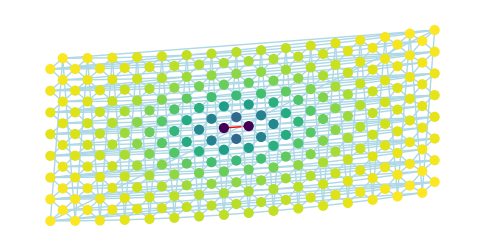

In [9]:
side = 16
G = lattices[side].G
node_color = lattices[side].eigV[0]
edge_color = ['lightblue' if e[2] > 0 else 'red' for e in G.edges(data='weight')]
#
fig, ax = plt.subplots(figsize=(6, 3))
nx.draw(G, ax=ax, pos = nx.get_node_attributes(G, 'pos'), 
        edge_color=edge_color, node_color=node_color, node_size=40)

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
#
ax.set_ylabel(r'${\phi(x,\, \bar{y}_{\parallel})}/{\phi_{\min}}$', labelpad=10)
ax.set_xlabel(r'$x$')
ax.set_xscale('symlog')
#
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
r_c = lattices[side].r_c
#
for side, c in zip(sizes[::-1], custom_cmap(np.linspace(0, 1, len(sizes)))):
    kwdict = {"ls": '-',
              'c': c, 
              'marker': 'H', 
              'ms': 10, 
              'mfc': set_alpha_torgb(c, 0.75), 
              'label': fr"$N={side**2}$"}
    eigen_state = unravel_1d_to_2d_nodemap(np.abs(lattices[side].eigV[0]), lattices[side].invnode_map)
    

    phi_plot = (eigen_state/np.min(eigen_state))[lattices[side].side1//2, :]#[indices[:, 0], indices[:, 1]]#[lattices[side].side1//2, :]
    x = np.linspace(-side//2, side//2, num=len(phi_plot))
    ax.plot(x, phi_plot, **kwdict)
#
    
x = np.linspace(-sizes[-1]//2, sizes[-1]//2, num=2000)
ax.plot(x, .35*np.log(np.abs(x))+1.3, c='red', label=r'$a\log(x) + b$')

handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, fontsize=24)
#
kwvlines = {'ls':'--', 'lw':1, 'c':'k'}
for i in [-1, +1, -r_c, +r_c]:
    ax.axvline(i, **kwvlines)
#
fig.savefig(f"{figpath}{lattices[sizes[0]].geo}_singleflip_para.pdf", bbox_inches='tight', transparent=True)
plt.close('all')

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
#
ax.set_ylabel(r'${\phi(x,\, \bar{y}_{\perp})}/{\phi_{\min}}$', labelpad=10)
ax.set_xlabel(r'$x$')
ax.set_xscale('symlog')
#
cmap_val = plt.cm.twilight(np.linspace(0.2, 0.8))
custom_cmap = LinearSegmentedColormap.from_list("restr_twilight", cmap_val)
#
r_c = lattices[side].r_c
#
for side, c in zip(sizes[::-1], custom_cmap(np.linspace(0, 1, len(sizes)))):
    kwdict = {"ls": '-',
              'c': c, 
              'marker': 'H', 
              'ms': 10, 
              'mfc': set_alpha_torgb(c, 0.75), 
              'label': fr"$N={side**2}$"}
    eigen_state = unravel_1d_to_2d_nodemap(np.abs(lattices[side].eigV[0]), lattices[side].invnode_map)
    

    phi_plot = (eigen_state/np.min(eigen_state))[:,lattices[side].side2//2]#[indices[:, 0], indices[:, 1]]#[lattices[side].side1//2, :]
    x = np.linspace(-side//2, side//2, num=len(phi_plot))-.5
    ax.plot(x, phi_plot, **kwdict)
x = np.linspace(-sizes[-1]//2, sizes[-1]//2, num=2000)
ax.plot(x, .35*np.log(np.abs(x))+1.3, c='red', label=r'$a\log(x) + b$')
#
handles, labels = plt.gca().get_legend_handles_labels()
handles = handles[::-1]
labels = labels[::-1]
ax.legend(handles, labels, fontsize=24)
#
kwvlines = {'ls':'--', 'lw':1, 'c':'k'}
for i in [-1, +1, -r_c, +r_c]:
    ax.axvline(i, **kwvlines)
#
    

fig.savefig(f"{figpath}{lattices[sizes[0]].geo}_singleflip_perp.pdf", bbox_inches='tight', transparent=True)
plt.close('all')